In [13]:
import csv
import os
import numpy as np
from get_data_at_location import get_data_at_location
from get_time_from_gps import get_time_from_gps
from calculate_confusion_matrix import calculate_confusion_matrix
import matplotlib.pyplot as plt
from sys import exit
import shutil

%matplotlib inline

probes = ['act','app','aud','bat','cal','coe','fus','lgt','run','scr','tch','wif']
save_results = False

data_dir = '/home/sohrob/Dropbox/Data/CS120/'
out_dir = 'data/'

subjects = os.listdir(data_dir)
subjects[0] = ''
subjects[48] = ''
subjects[52] = ''
#48 skipped / this subject's eml.csv file contain lots of empty elements that should be removed
#52 as well
subjects = subjects[148:]

for subj in subjects:
    filename = data_dir + subj + '/eml.csv'
    if os.path.exists(filename):
        print filename
        loc = []
        lat_report = []
        lng_report = []
        t_report = []
        with open(filename) as file_in:
            data = csv.reader(file_in, delimiter='\t')
            eml = []
            for data_row in data:
                if data_row:
                    # reading location category (state)
                    loc_string = data_row[6]
                    loc_string = loc_string[1:len(loc_string)-1]
                    loc_string.split(',')
                    loc.append(loc_string)
                    
                    # reading lat. and long.
                    lat_report.append(float(data_row[2]))
                    lng_report.append(float(data_row[3]))
                    t_report.append(float(data_row[0]))
                    
                    # adding to eml
                    eml.append(data_row)
                    
        file_in.close()
    else:
        print 'skipping subject '+subj+' without location report data.'
        continue
                       
    # looking into data between current and previous report
    filename = data_dir + subj + '/fus.csv'
    if os.path.exists(filename):
        with open(filename) as file_in:
            data_gps = csv.reader(file_in, delimiter='\t')
            t_gps = []
            lat_gps = []
            lng_gps = []
            for row_gps in data_gps:
                if row_gps:
                    t_gps.append(float(row_gps[0]))
                    lat_gps.append(float(row_gps[1]))
                    lng_gps.append(float(row_gps[2]))
        file_in.close()
    else:
        print 'skipping subject '+subj+' without location data.'
        continue

    if os.path.exists(out_dir+subj):
        shutil.rmtree(out_dir+subj)
        os.makedirs(out_dir+subj)
    else:
        os.makedirs(out_dir+subj)
    
    t_prev = 0
    
    for (i,eml_row) in enumerate(eml):

        # finding t_start and t_end from gps data
        t_start, t_end = get_time_from_gps(data_dir+subj, t_report[i], t_prev, lat_report[i], lng_report[i])

        # creating a dir and writing the eml row
        loc_dir = out_dir+subj+'/'+str(i)
        if not os.path.exists(loc_dir):
            os.makedirs(loc_dir)
        with open(loc_dir+'/'+'eml.csv','w') as f:
            fwriter = csv.writer(f, delimiter='\t', quotechar='|',quoting=csv.QUOTE_MINIMAL)
            fwriter.writerow(eml_row)
        f.close()
        
        # if there is any clusters found, extract sensor data and put in a separate file
        if len(t_start)>0:
            for probe in probes:
                data = get_data_at_location(data_dir+subj, t_start, t_end, probe)
                if len(data)>0:
                    with open(loc_dir+'/'+probe+'.csv', 'w') as f:
                        fwriter = csv.writer(f, delimiter='\t', quotechar='|',quoting=csv.QUOTE_MINIMAL)
                        for (j,d) in enumerate(data):
                            fwriter.writerow(d)
                    f.close()
        else:
            print 'instance '+str(i)+' skipped'

        if i<len(t_report)-1:
            if t_report[i]!=t_report[i+1]:
                t_prev = t_report[i]
                

exit(0)

/home/sohrob/Dropbox/Data/CS120/1255682/eml.csv
no data - instance skipped
instance 2 skipped
no data - instance skipped
instance 31 skipped
no data - instance skipped
instance 32 skipped
no data - instance skipped
instance 33 skipped
no data - instance skipped
instance 58 skipped
no data - instance skipped
instance 72 skipped
no data - instance skipped
instance 82 skipped
no data - instance skipped
instance 97 skipped
no data - instance skipped
instance 115 skipped
no data - instance skipped
instance 164 skipped


SystemExit: 0

To exit: use 'exit', 'quit', or Ctrl-D.


In [37]:
print len(loc)
print len(t_report)
print loc

107
107
['"Home"', '"Work"', '"Gym or Other Exercise"', '"Home"', '"Work"', '"Home"', '"Work"', '"Home"', '"Another\'s Home"', '"Home"', '"Nightlife Spot (Bar, Club)", "Food (Restaurant, Cafe)"', '"Another\'s Home"', '"Work"', '"Home"', '"Work"', '"Gym or Other Exercise"', '"Home"', '"Work"', '"Gym or Other Exercise"', '"Home"', '"Work"', '"Home"', '"Home"', '"Work"', '"Shop or Store"', '"Home"', '"Work"', '"Home"', '"Another\'s Home"', '"Home"', '"Work"', '"Home"', '"Work"', '"Another\'s Home"', '"Home"', '"Work"', '"Food (Restaurant, Cafe)"', '"Home"', '"Work"', '"Home"', '"Food (Restaurant, Cafe)"', '"Home"', '"Home"', '"Work"', '"Home"', '"Work"', '"Home"', '"Work"', '"Home"', '"Work"', '"Work"', '"Home"', '"Home"', '"Home"', '"Home"', '"Home"', '"Home"', '"Professional or Medical Office"', '"Home"', '"Home"', '"Another\'s Home"', '"Another\'s Home"', '"Home"', '"Home"', '"Food (Restaurant, Cafe)"', '"Home"', '"Nightlife Spot (Bar, Club)"', '"Work"', '"Home"', '"shadow ridge middle

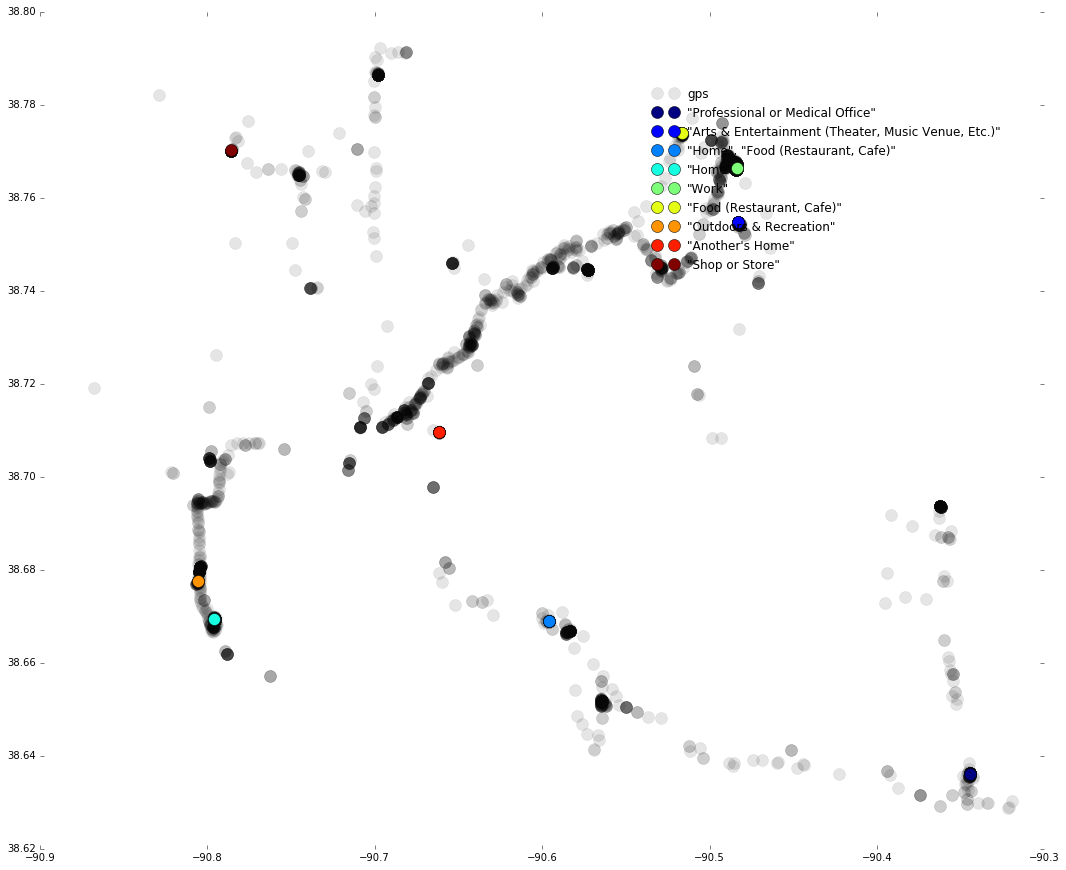

In [43]:
# spatial visualization
colors = plt.cm.jet(np.linspace(0,1,len(loc_uniq)))
plt.figure(figsize=(18,15))
plt.rcParams['figure.figsize'] = (10, 6)
plt.plot(np.array(lng_gps),np.array(lat_gps),'ko',alpha=0.1, markersize=12)
for i in range(len(loc_uniq)):
    inds = loc.index(loc_uniq[i])
    plt.plot(np.array(lng_report[inds]), np.array(lat_report[inds]), 'o', color=colors[i], alpha=1, markersize=12)
plt.legend(['gps']+loc_uniq, frameon=False, loc='center left', bbox_to_anchor=(0.6, 0.8))
plt.box()

['"Home"', '"Home"', '"Home"', '"Home"', '"Professional or Medical Office"', '"Shop or Store"', '"Shop or Store"', '"Home"', '"Work"', '"Home"', '"Work"', '"Work"', '"Home"', '"Home"', '"Work"', '"Work"', '"Another\'s Home"', '"Home"', '"Another\'s Home"', '"Outdoors & Recreation"', '"Home"', '"Home"', '"Shop or Store"', '"Home", "Food (Restaurant, Cafe)"', '"Shop or Store"', '"Shop or Store"', '"Home"', '"Work"', '"Home"', '"Home"', '"Work"', '"Home"', '"Work"', '"Shop or Store"', '"Home"', '"Another\'s Home"', '"Food (Restaurant, Cafe)"', '"Home"', '"Arts & Entertainment (Theater, Music Venue, Etc.)"', '"Home"', '"Home"', '"Work"', '"Home"', '"Home"', '"Work"', '"Work"', '"Home"', '"Home"', '"Work"', '"Arts & Entertainment (Theater, Music Venue, Etc.)"', '"Home"', '"Home"', '"Work"', '"Home"', '"Work"', '"Home"', '"Work"', '"Home"', '"Work"', '"Shop or Store"', '"Home"', '"Work"', '"Shop or Store"', '"Home"', '"Work"', '"Arts & Entertainment (Theater, Music Venue, Etc.)"', '"Home"', 

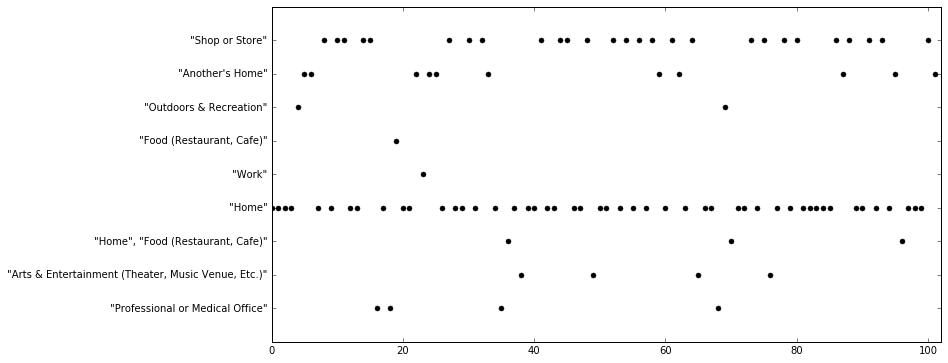

In [83]:
# temporal visualization
print loc
le = preprocessing.LabelEncoder()
le.fit(loc)
loc_code = le.transform(loc)
plt.figure(figsize=(12,6))
plt.plot(loc_code,'.k',markersize=10)
plt.yticks(range(len(loc_uniq)), loc_uniq)
axes = plt.gca()
axes.set_xlim([0, len(loc_code)])
axes.set_ylim([-1, len(loc_uniq)])
print t_report

no data - instance skipped
no data - instance skipped
no data - instance skipped
no data - instance skipped
no data - instance skipped
no data - instance skipped
no data - instance skipped
no data - instance skipped
no data - instance skipped
no data - instance skipped
no data - instance skipped
no data - instance skipped
no data - instance skipped
no data - instance skipped
no data - instance skipped
no data - instance skipped
no data - instance skipped
no data - instance skipped
no data - instance skipped
no data - instance skipped
no data - instance skipped
no data - instance skipped
no data - instance skipped
no data - instance skipped
no data - instance skipped
no data - instance skipped
no data - instance skipped
no data - instance skipped


['"Home"', '"Work"', '"Shop or Store"']


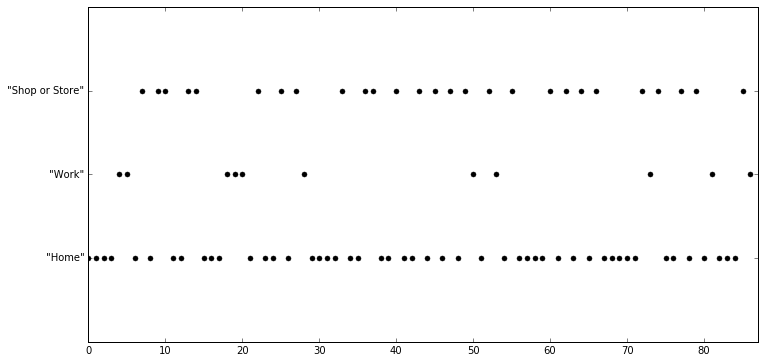

In [13]:
# temporal visualization
plt.figure(figsize=(12,6))
plt.plot(state_code,'.k',markersize=10)
plt.yticks(range(len(loc_uniq)), loc_uniq)
axes = plt.gca()
axes.set_xlim([0, len(state_code)])
axes.set_ylim([-1, len(loc_uniq)])
print loc_uniq

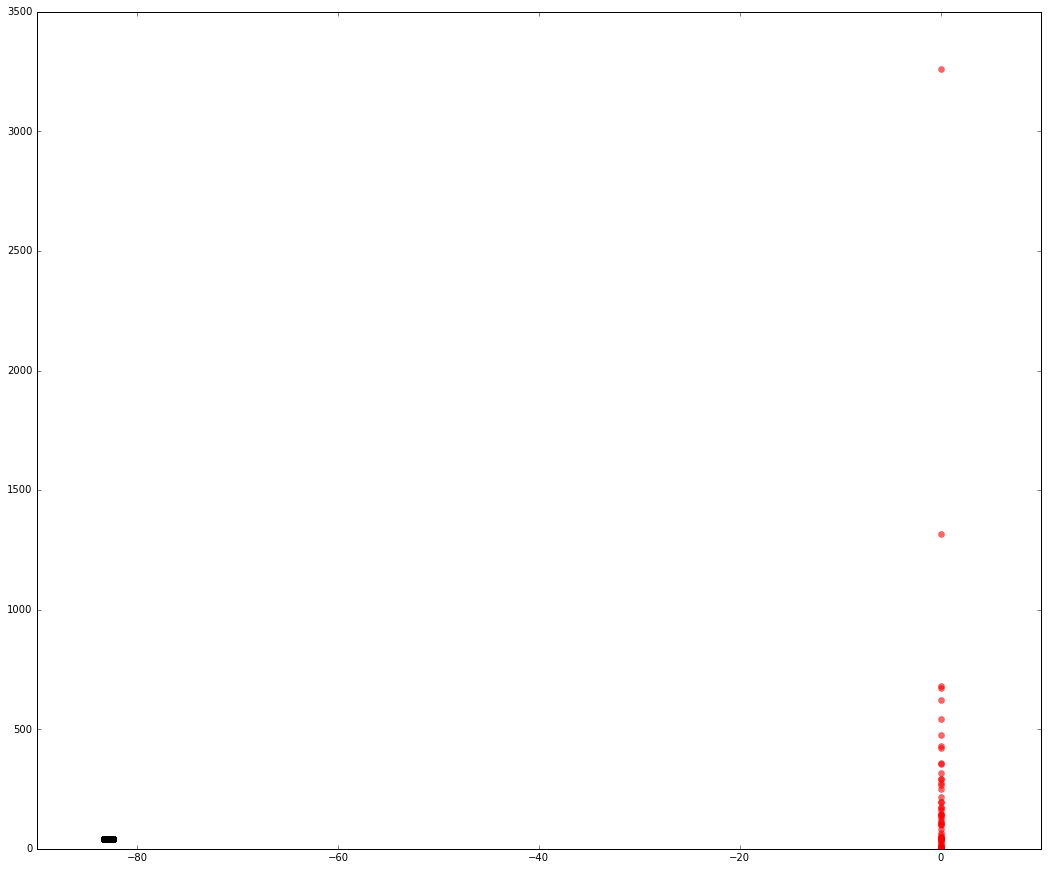

In [15]:
plt.figure(figsize=(18,15))
plt.plot(np.array(lng_gps),np.array(lat_gps),'k.', markersize=12, alpha=.6)
plt.plot(feature[:,1],feature[:,0],'r.', markersize=12, alpha=.6)
#plt.plot(np.array(lng_report),np.array(lat_report),'r.', markersize=12, alpha=.6)

([<matplotlib.axis.XTick at 0x7fd1e83e3fd0>,
 <a list of 7 Text xticklabel objects>)

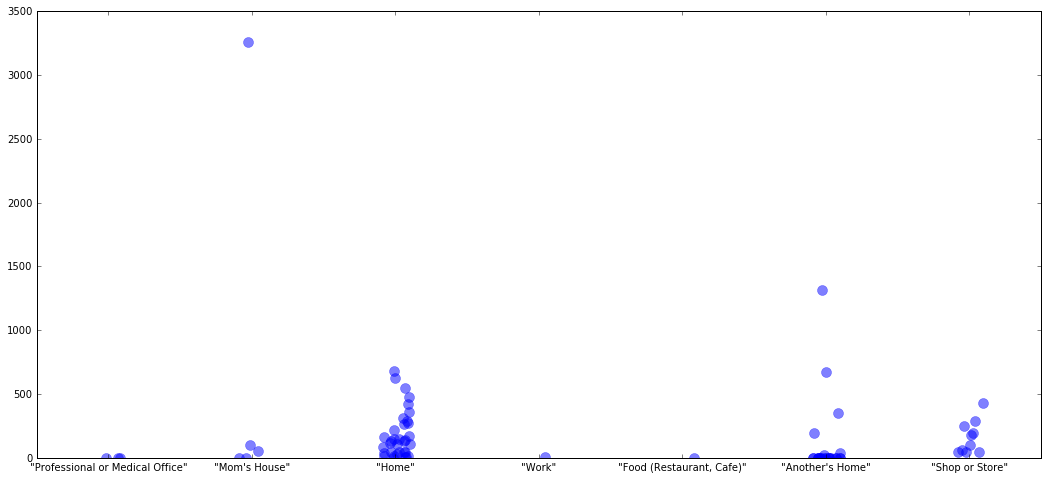

In [18]:
# distribution of features across locations
ft = 0
plt.figure(figsize=(18,8))
plt.plot(state_code+np.random.uniform(-.1,.1,len(state_code)), feature[:,ft],'.',markersize=20, alpha=.5)
axes = plt.gca()
axes.set_xlim([-.5, len(loc_uniq)-.5])
plt.xticks(range(len(loc_uniq)), loc_uniq)


In [14]:
#creating train and test sets
split = np.floor(state_code.size/2)
x_train = feature[0:split,:]
x_test = feature[(split+1):,:]
y_train = state_code[0:split]
y_test = state_code[(split+1):]

#train
gbm = xgboost.XGBClassifier(max_depth=3, n_estimators=300, learning_rate=0.05).fit(x_train, y_train)

#test
predictions = gbm.predict(x_test)

#print predictions
#print y_test
conf, roc_auc = calculate_confusion_matrix(predictions, y_test)
print loc_uniq
print conf
print roc_auc

#clf = RandomForestClassifier(n_estimators=100)
#scores = cross_val_score(clf, feature, state_code, cv=n_folds)
#print scores.mean()

['"Home"', '"Work"', '"Shop or Store"']
[[ 24.   0.   0.]
 [  2.   3.   0.]
 [  0.   4.  10.]]
[ 0.96153846  0.68650794  0.93939394]


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:3: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  app.launch_new_instance()
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:4: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:5: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:6: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [18]:
print subj
print len(subjects[26:])

1054952
183
